# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('/Users/keisukekonno/Documents/NTNU/ML_in_Practice/assignment')

In [3]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Check datset information

## Visualize null values

In [4]:
def make_null_table(df): 
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    null_table = pd.concat([null_val, percent], axis=1)
    null_table_renamed = null_table.rename(
    columns = {0 : 'Null Amount', 1 : '%'})
    return null_table_renamed

make_null_table(data)

,Null Amount,%
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,140,19.662921
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.280899
Survived,0,0.000000


In [5]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       572 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  710 non-null    object 
 8   Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 50.2+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

In [6]:
# Generates pie chart based on the specified column and returrnx
def generate_pie_chart(df, column_name):
    ax = df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=df[column_name].unique())
    ax.set_title(column_name + ' Distribution')
    return ax

# Generate bar chart based on the specified column and return the ax
def generate_bar_chart(df, column_name):
    df_tmp = df.groupby([column_name, 'Survived']).size().unstack(fill_value=0)
    ax = df_tmp.plot(kind='bar', stacked=False,color=['orange', 'skyblue'])
    return ax

# generate bar chart and translate the numbers into percentages
def generate_bar_chart_percentage(df, column_name):
    df_tmp = df.groupby([column_name, 'Survived']).size().unstack(fill_value=0)
    df_tmp = df_tmp.div(df_tmp.sum(axis=1), axis=0)
    ax = df_tmp.plot(kind='bar', stacked=False, color=['orange', 'skyblue'])
    ax.set_title(column_name + ' Survival Rate in Percentage')
    return ax
    
def generate_graph(df, column_name):
    ax1 = generate_pie_chart(df, column_name)
    ax2 = generate_bar_chart(df, column_name)
    ax3 = generate_bar_chart_percentage(df, column_name)
    return ax1, ax2, ax3

(<Axes: title={'center': 'Sex Distribution'}, ylabel='count'>,
 <Axes: xlabel='Sex'>,
 <Axes: title={'center': 'Sex Survival Rate in Percentage'}, xlabel='Sex'>)

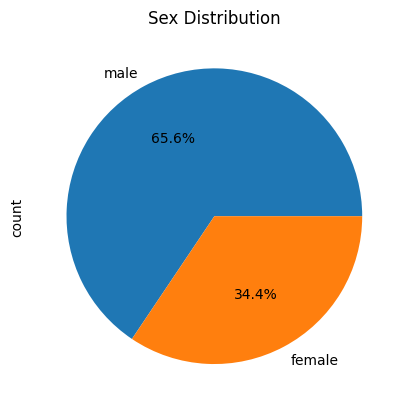

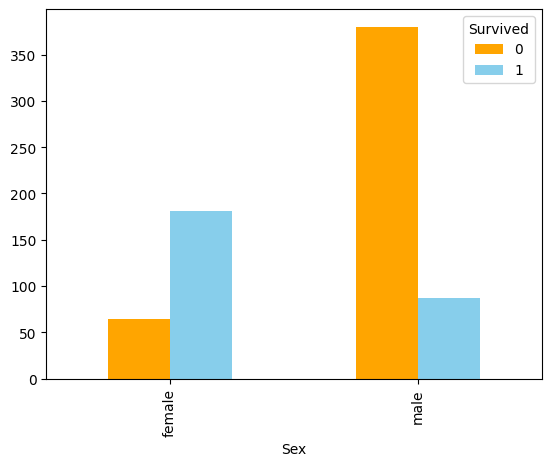

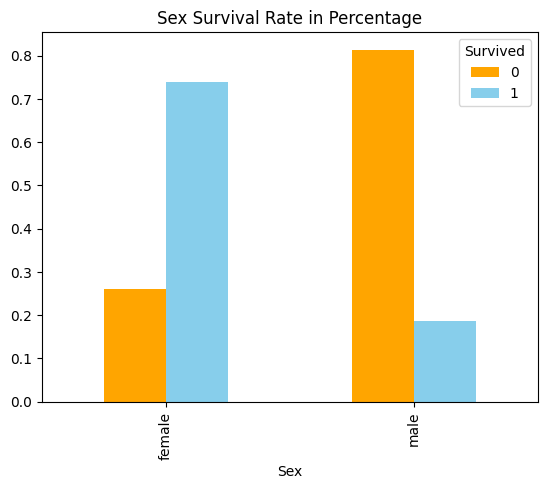

In [7]:
generate_graph(data, 'Sex')
    

# Question 1: Did first-class passengers survive more?

Answer: YES

(<Axes: title={'center': 'Pclass Distribution'}, ylabel='count'>,
 <Axes: xlabel='Pclass'>,
 <Axes: title={'center': 'Pclass Survival Rate in Percentage'}, xlabel='Pclass'>)

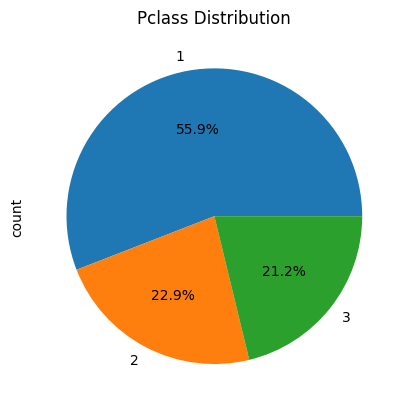

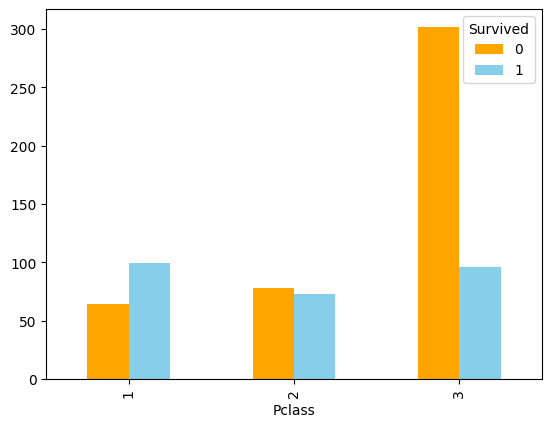

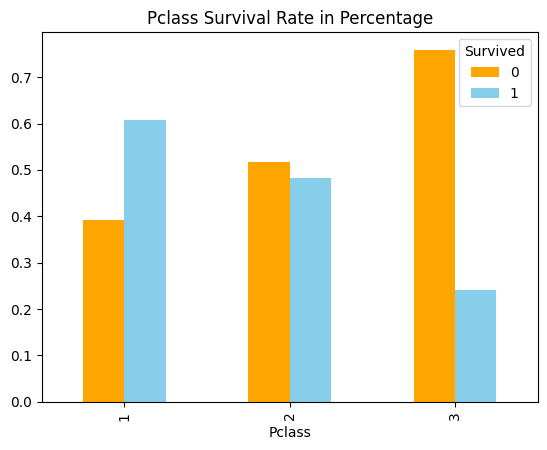

In [8]:
generate_graph(data, 'Pclass')

# Question 2: Is survival related to Embarked?

Answer: Yes, a little bit  
If you are embarked from Cherbourg, you have a little bit higher chance to survive  

(<Axes: title={'center': 'Embarked Distribution'}, ylabel='count'>,
 <Axes: xlabel='Embarked'>,
 <Axes: title={'center': 'Embarked Survival Rate in Percentage'}, xlabel='Embarked'>)

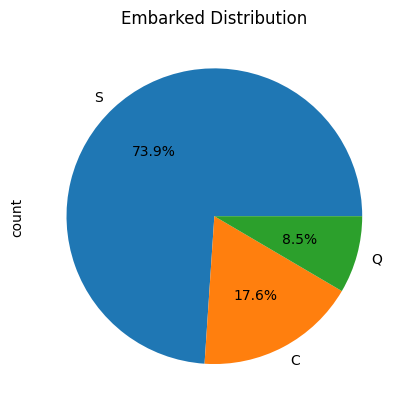

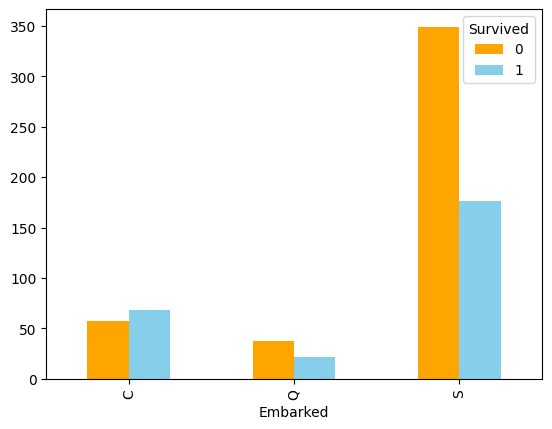

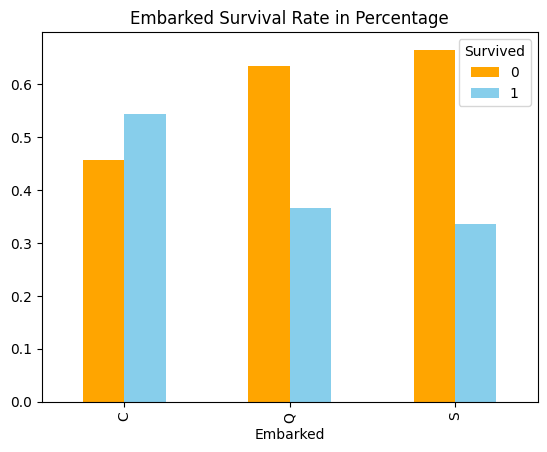

In [9]:
generate_graph(data, 'Embarked')

# Question 3: How is age related to survival?

Answer: Younger people (age < 10) have a higher chance to survive  

In [10]:
print(f'Max Age:{data["Age"].max()}')
print(f'Min Age:{data["Age"].min()}')

Max Age:80.0
Min Age:0.42


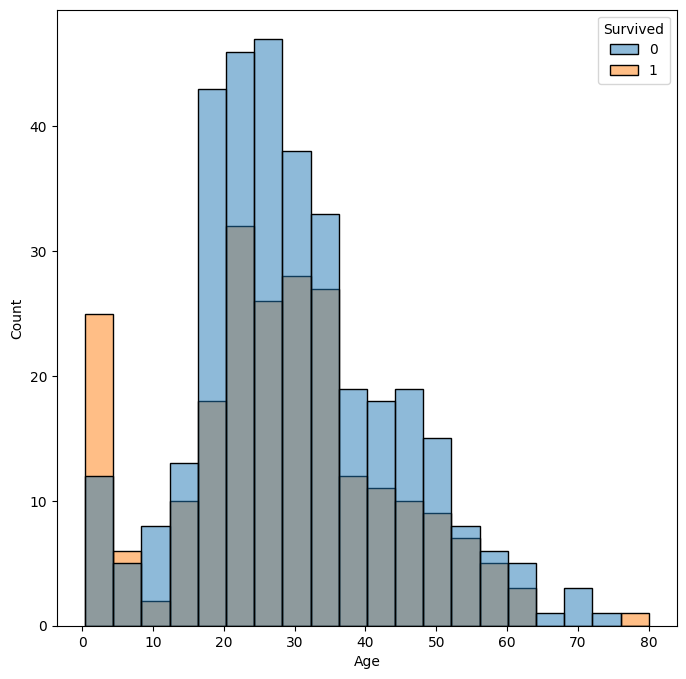

In [11]:
# Histogram of Age and Survived
plt.figure(figsize=(8, 8))
sns.histplot(data=data, x='Age', hue='Survived', multiple='layer', color=['orange', 'skyblue'])
plt.show()

# Question 4: Does family size somehow affect the survival rate?

Answer: Looking at the distribution of SibSp, sample size of number more than 3 is too small to draw a conclusion.  
However, the more the passenger has siblings or spouse, the lower chance to survive.  
This applies to parents or children as well, but it varies a lot.  

(<Axes: title={'center': 'SibSp Distribution'}, ylabel='count'>,
 <Axes: xlabel='SibSp'>,
 <Axes: title={'center': 'SibSp Survival Rate in Percentage'}, xlabel='SibSp'>)

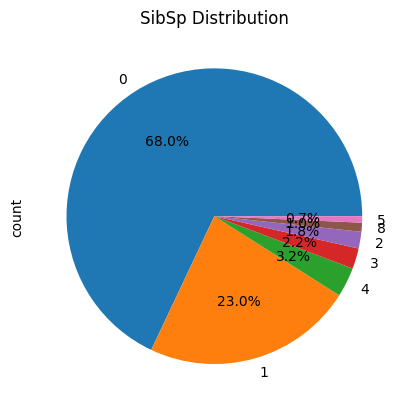

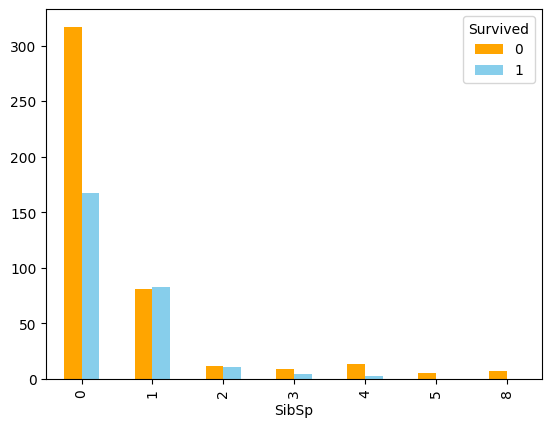

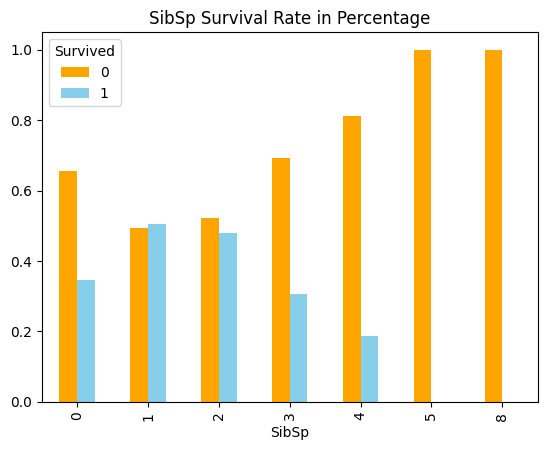

In [12]:
generate_graph(data, 'SibSp')

(<Axes: title={'center': 'Parch Distribution'}, ylabel='count'>,
 <Axes: xlabel='Parch'>,
 <Axes: title={'center': 'Parch Survival Rate in Percentage'}, xlabel='Parch'>)

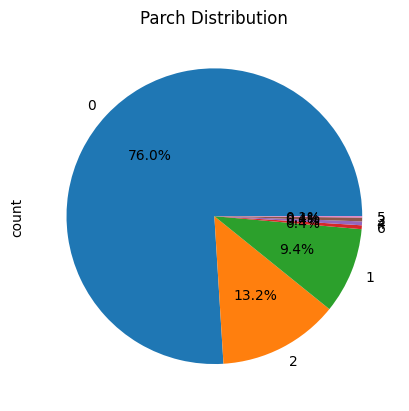

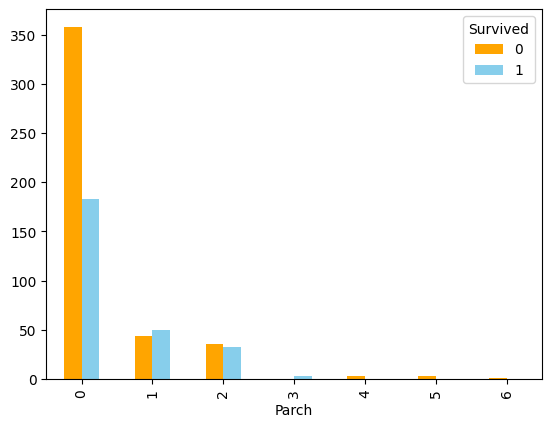

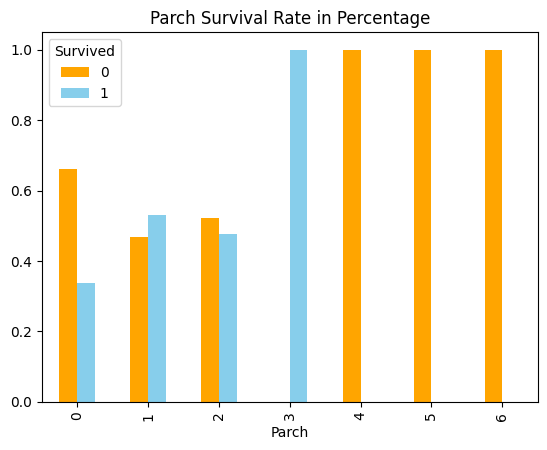

In [13]:
generate_graph(data, 'Parch')

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, any titles related to lady (Mrs, Miss) tend to have higher survival rate.  

In [14]:
# Extract the title from the Name column
for name in data['Name']:
    data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

print(data['Title'].value_counts())

Title
Mr          419
Miss        143
Mrs          96
Master       33
Rev           5
Dr            5
Major         2
Col           2
Mlle          2
Capt          1
Mme           1
Ms            1
Countess      1
Lady          1
Name: count, dtype: int64


In [15]:
# count the number of survived for each title
data.groupby('Title')['Survived'].sum()

Title
Capt         0
Col          1
Countess     1
Dr           2
Lady         1
Major        1
Master      18
Miss        95
Mlle         2
Mme          1
Mr          65
Mrs         80
Ms           1
Rev          0
Name: Survived, dtype: int64